<div class="alert alert-block alert-success">
# Titanic Data 

<div class="alert alert-block alert-warning">
# Workflow

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

***

### Classifying. 

We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

### Correlating. 
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

### Converting. 
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

### Completing. 
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

### Correcting. 
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

### Creating. 
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

### Charting. 
How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on Which chart or graph is right for you?.
Refactor Release 2017-Jan-29

<div class="alert alert-block alert-success">
# Load Python Packages we need for analysis

In [512]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [513]:
# Manus Added Corrplot
import string

from biokit.viz import corrplot

# Manus Added Adaboost
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

<div class="alert alert-block alert-success">
# Get some data - Read CSV's - Panda's is good here.

### (Or get data from Databases)

In [409]:
train_df = pd.read_csv('C:/Users/Toshiba/Downloads/Titanic/train.csv')
test_df = pd.read_csv('C:/Users/Toshiba/Downloads/Titanic/test.csv')

## Below we combine the data we imported from the csv's. It makes it easier to edit columns in both  test and train files without having to do for each.

In [410]:
combine = [train_df, test_df]

<div class="alert alert-block alert-success">
# Analyze by describing data - Panda's is good here.

In [411]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<div class="alert alert-block alert-info">

### Note: Blue boxes give the correct output, that should be returned when you run the code
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

<div class="alert alert-block alert-success">
## But First!!! Identify your data types - General Good Practice...

<div class="alert alert-block alert-warning">

These values classify the samples into sets of similar samples. Among other things this helps us select the appropriate plots for visualization.


**Which features are categorical?**

1. nominal
2. ordinal
3. ratio
4. interval

 -  Categorical: Survived, Sex, and Embarked. 
 -  Ordinal: Pclass
 -  Ratio: n/a
 -  Interval based: n/a

**Which features are numerical?** These values change from sample to sample. Within numerical features are the values 

1. discrete
2. continuous
3. timeseries based

 -  Discrete: SibSp, Parch
 -  Continous: Age, Fare
 -  timeseries: n/a
 
 

![alt text](https://image.slidesharecdn.com/e0f19157-e716-42cb-80e5-2609351fda96-150313093131-conversion-gate01/95/introtoml-10-638.jpg?cb=1426257172)

![alt text](https://image.slidesharecdn.com/spssmeasurementscales-121020234642-phpapp02/95/spss-measurement-scales-20-638.jpg?cb=1350776857)

![alt text](http://www.cqeacademy.com/wp-content/uploads/2013/10/Measurement-Scale-Table.jpg)

![alt text](http://chi2innovations.com/media/cms_page_media/23/Infographic%20-%20Types%20Of%20Data%20-%20570x734.jpg)

<div class="alert alert-block alert-success">
# Lets start looking at the data. 

In [412]:
# **Look at the top of dataframe" or "csv/worksheet/DB Query Export etc etc**

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-block alert-info">

PassengerId 	Survived 	Pclass 	Name 	Sex 	Age 	SibSp 	Parch 	Ticket 	Fare 	Cabin 	Embarked
0 	1 	0 	3 	Braund, Mr. Owen Harris 	male 	22.0 	1 	0 	A/5 21171 	7.2500 	NaN 	S
1 	2 	1 	1 	Cumings, Mrs. John Bradley (Florence Briggs Th... 	female 	38.0 	1 	0 	PC 17599 	71.2833 	C85 	C
2 	3 	1 	3 	Heikkinen, Miss. Laina 	female 	26.0 	0 	0 	STON/O2. 3101282 	7.9250 	NaN 	S
3 	4 	1 	1 	Futrelle, Mrs. Jacques Heath (Lily May Peel) 	female 	35.0 	1 	0 	113803 	53.1000 	C123 	S
4 	5 	0 	3 	Allen, Mr. William Henry 	male 	35.0 	0 	0 	373450 	8.0500 	NaN 	S

<div class="alert alert-block alert-warning">

Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

    Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

    Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [413]:
# **Look at the top of dataframe" or "csv/worksheet/DB Query Export etc etc**

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<div class="alert alert-block alert-info">

PassengerId 	Survived 	Pclass 	Name 	Sex 	Age 	SibSp 	Parch 	Ticket 	Fare 	Cabin 	Embarked
886 	887 	0 	2 	Montvila, Rev. Juozas 	male 	27.0 	0 	0 	211536 	13.00 	NaN 	S
887 	888 	1 	1 	Graham, Miss. Margaret Edith 	female 	19.0 	0 	0 	112053 	30.00 	B42 	S
888 	889 	0 	3 	Johnston, Miss. Catherine Helen "Carrie" 	female 	NaN 	1 	2 	W./C. 6607 	23.45 	NaN 	S
889 	890 	1 	1 	Behr, Mr. Karl Howell 	male 	26.0 	0 	0 	111369 	30.00 	C148 	C
890 	891 	0 	3 	Dooley, Mr. Patrick 	male 	32.0 	0 	0 	370376 	7.75 	NaN 	Q

<div class="alert alert-block alert-warning">

Which features contain blank, null or empty values?

These will require correcting.

    Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
    Cabin > Age are incomplete in case of test dataset.

What are the data types for various features?

Helping us during converting goal.

    Seven features are integer or floats. Six in case of test dataset.
    Five features are strings (object).

In [414]:
# To print a line break use code below

print('_'*40)

________________________________________


In [415]:
# Lets get some info on both test and train df's. Namely record counts, identift if there are nulls andhow the data is stored

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

<div class="alert alert-block alert-info">

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

<div class="alert alert-block alert-success">

## The Vital Statistics - The Average, Sum etc - Things one can aggregate on.

<div class="alert alert-block alert-warning">
## What is the distribution of numerical feature values across the samples? 

These 

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

    Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
    Survived is a categorical feature with 0 or 1 values.
    Around 38% samples survived representative of the actual survival rate at 32%.
    Most passengers (> 75%) did not travel with parents or children.
    Nearly 30% of the passengers had siblings and/or spouse aboard.
    Fares varied significantly with few passengers (<1%) paying as high as $512.
    Few elderly passengers (<1%) within age range 65-80.

In [416]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div class="alert alert-block alert-info">

PassengerId 	Survived 	Pclass 	Age 	SibSp 	Parch 	Fare
count 	891.000000 	891.000000 	891.000000 	714.000000 	891.000000 	891.000000 	891.000000
mean 	446.000000 	0.383838 	2.308642 	29.699118 	0.523008 	0.381594 	32.204208
std 	257.353842 	0.486592 	0.836071 	14.526497 	1.102743 	0.806057 	49.693429
min 	1.000000 	0.000000 	1.000000 	0.420000 	0.000000 	0.000000 	0.000000
25% 	223.500000 	0.000000 	2.000000 	20.125000 	0.000000 	0.000000 	7.910400
50% 	446.000000 	0.000000 	3.000000 	28.000000 	0.000000 	0.000000 	14.454200
75% 	668.500000 	1.000000 	3.000000 	38.000000 	1.000000 	0.000000 	31.000000
max 	891.000000 	1.000000 	3.000000 	80.000000 	8.000000 	6.000000 	512.329200

<div class="alert alert-block alert-warning">

- Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
 
- Review Parch distribution using `percentiles=[.75, .8]`

- SibSp distribution `[.68, .69]`

- Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

In [417]:
a = train_df.describe

In [418]:
a ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [419]:
np.percentile(train_df['Survived'], [62, 61])

array([ 1.,  0.])

In [420]:
np.percentile(train_df['Parch'], [75, 80])

array([ 0.,  1.])

In [421]:
np.percentile(train_df['SibSp'], [68, 69])

array([ 0.,  1.])

In [422]:
np.percentile(train_df['Fare'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 99])

array([   0.     ,    6.3975 ,    6.975  ,    7.05252,    7.225  ,
          7.225  ,    7.2292 ,    7.25   ,    7.25   ,  249.00622])

In [423]:
np.percentile(train_df['Age'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 99])

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

<div class="alert alert-block alert-warning">

What is the distribution of categorical features?

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [424]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [425]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div class="alert alert-block alert-info">
Name 	Sex 	Ticket 	Cabin 	Embarked
count 	891 	891 	891 	204 	889
unique 	891 	2 	681 	147 	3
top 	Williams, Mr. Howard Hugh "Harry" 	male 	CA. 2343 	B96 B98 	S
freq 	1 	577 	m7 	4 	644

<div class="alert alert-block alert-success">

## Assumtions based on data analysis

<div class="alert alert-block alert-warning">

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating.

    We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing.

    We may want to complete Age feature as it is definitely correlated to survival.
    We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

### Correcting.

    Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    PassengerId may be dropped from training dataset as it does not contribute to survival.
    Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

### Creating.

    We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    We may want to engineer the Name feature to extract Title as a new feature.
    We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    We may also want to create a Fare range feature if it helps our analysis.

### Classifying.

#### We may also add to our assumptions based on the problem description noted earlier.

    Women (Sex=female) were more likely to have survived.
    Children (Age<?) were more likely to have survived.
    The upper-class passengers (Pclass=1) were more likely to have survived.

<div class="alert alert-block alert-danger">
# Need to add the ability to standardise & normalise

<div class="alert alert-block alert-success">
# More looking at the data, Using Pivots and Aggregates

### Analyze by pivoting features

    To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. 
    
Piviting makes sense doing so only for features which are 

 - categorical (Sex), 
 - ordinal (Pclass)
 - discrete (SibSp, Parch)
 
.
 
 
    Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.   
    Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1). 
    SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [426]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<div class="alert alert-block alert-info">
Pclass 	Survived
0 	1 	0.629630
1 	2 	0.472826
2 	3 	0.242363

In [427]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<div class="alert alert-block alert-info">

Sex 	Survived
0 	female 	0.742038
1 	male 	0.188908

In [428]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<div class="alert alert-block alert-info">

SibSp 	Survived
1 	1 	0.535885
2 	2 	0.464286
0 	0 	0.345395
3 	3 	0.250000
4 	4 	0.166667
5 	5 	0.000000
6 	8 	0.000000

In [429]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<div class="alert alert-block alert-info">

Parch 	Survived
3 	3 	0.600000
1 	1 	0.550847
2 	2 	0.500000
0 	0 	0.343658
5 	5 	0.200000
4 	4 	0.000000
6 	6 	0.000000

<div class="alert alert-block alert-success">

## Analyze by visualizing data

<div class="alert alert-block alert-warning">

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

 - Infants (Age <=4) had high survival rate.
 - Oldest passengers (Age = 80) survived.
 - Large number of 15-25 year olds did not survive.
 - Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

    We should consider Age (our assumption classifying #2) in our model training.
    Complete the Age feature for null values (completing #1).
    We should band age groups (creating #3).

<div class="alert alert-block alert-success">
## Look at a histogram - FacetGrid
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')

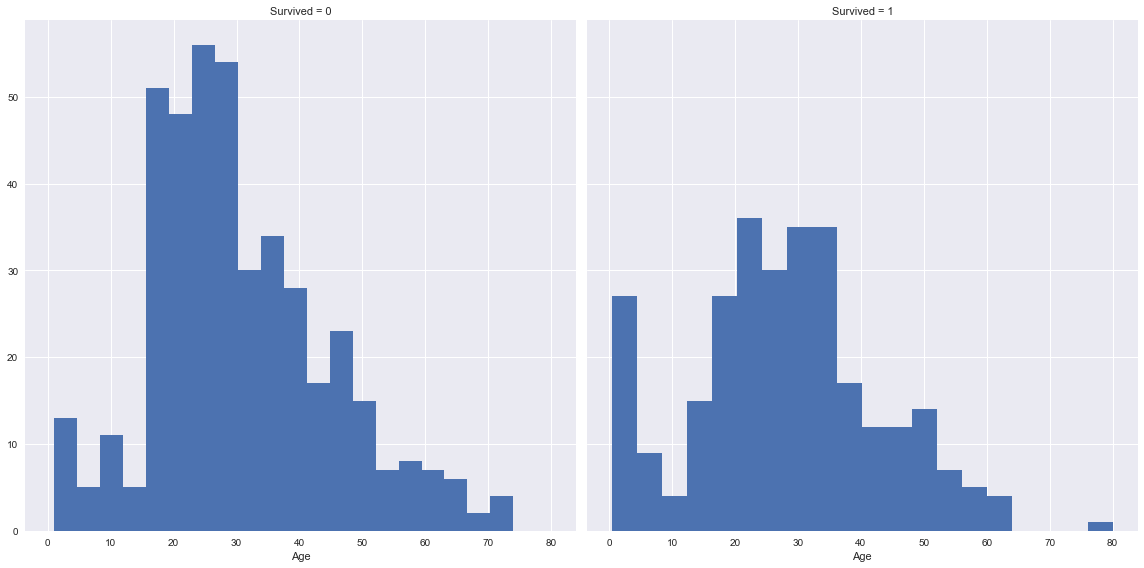

In [430]:
g = sns.FacetGrid(train_df, col='Survived',size= 8)
g.map(plt.hist, 'Age', bins=20)

<div class="alert alert-block alert-success">

## Correlating numerical and ordinal features

<div class="alert alert-block alert-warning">

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

### Observations.

    Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
    Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
    Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
    Pclass varies in terms of Age distribution of passengers.

### Decisions.

    Consider Pclass for model training.

<div class="alert alert-block alert-success">
## Look at a histogram - FacetGrid - Numeric / Continious Data
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')

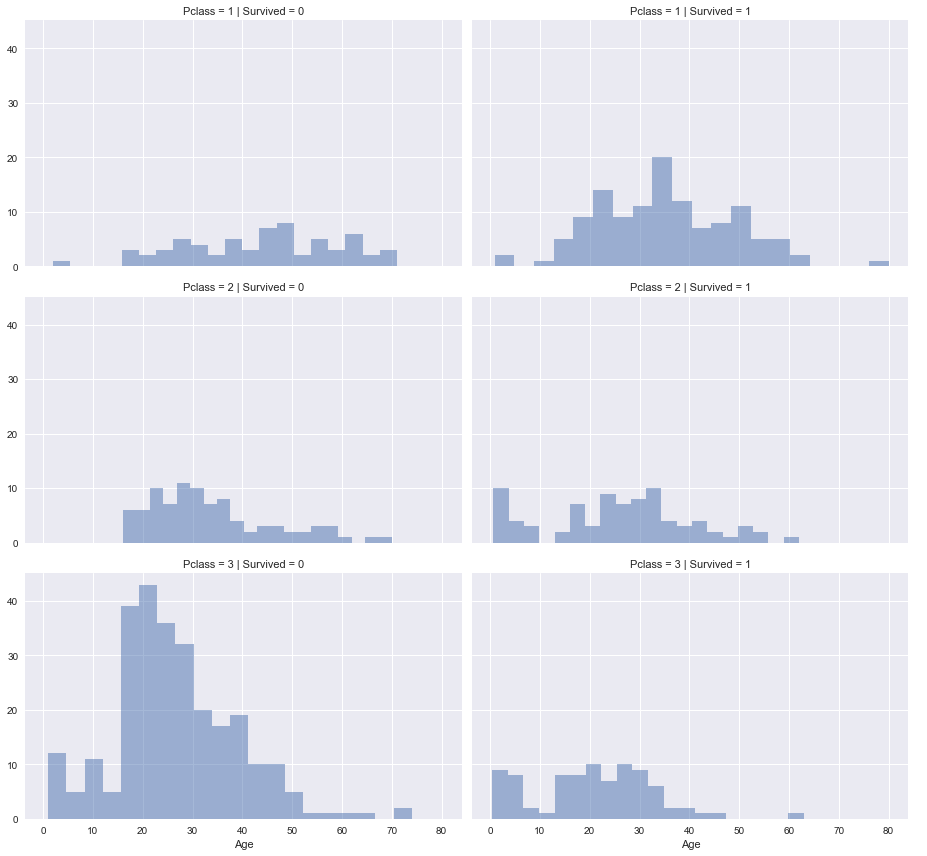

In [431]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<div class="alert alert-block alert-success">
## Correlating categorical features

Now we can correlate categorical features with our solution goal.

Observations.

    Female passengers had much better survival rate than males. Confirms classifying (#1).
    Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
    Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Decisions.

    Add Sex feature to model training.
    Complete and add Embarked feature to model training.

<div class="alert alert-block alert-success">
## Look at a point plot - FacetGrid - Numeric / Continious Data
grid = sns.FacetGrid(train_df, col='Embarked')

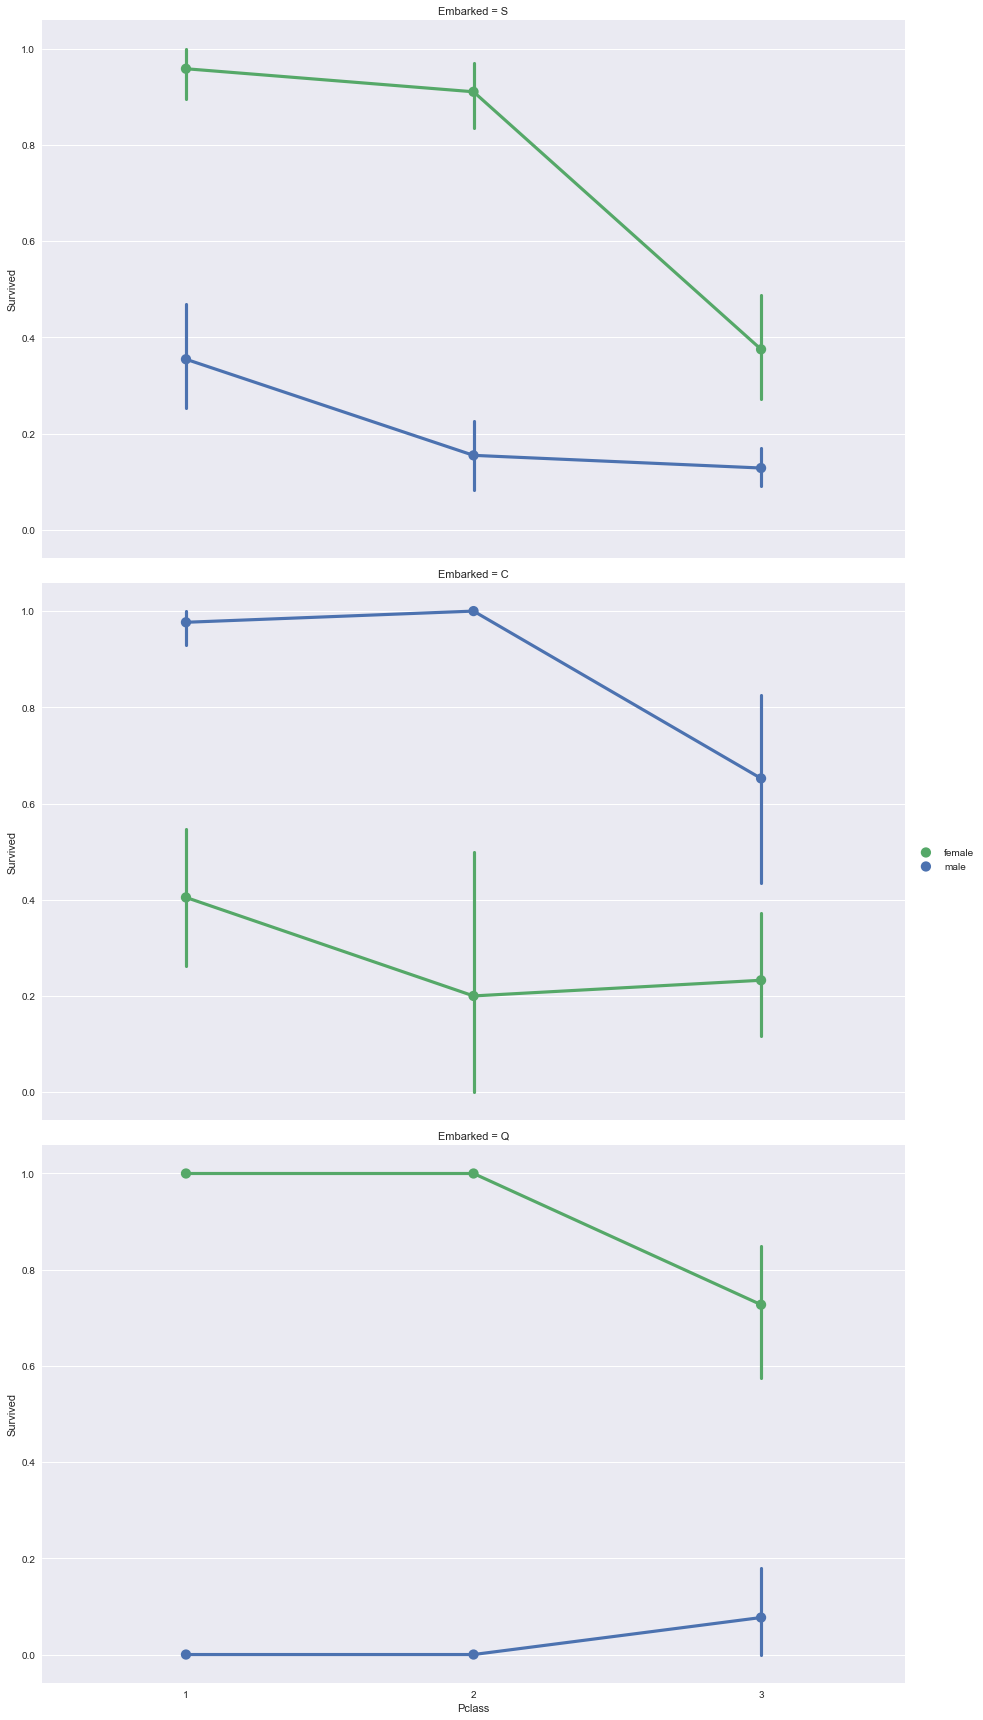

In [432]:
grid = sns.FacetGrid(train_df, row='Embarked', size=8, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<div class="alert alert-block alert-warning">

<seaborn.axisgrid.FacetGrid at 0x7f5502b858d0>

<div class="alert alert-block alert-success">
## Correlating categorical and numerical features

<div class="alert alert-block alert-warning">
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

Observations.

    Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
    Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

Decisions.

    Consider banding Fare feature.

<div class="alert alert-block alert-success">
## Look at a barplot - FacetGrid - Correlating categorical and numerical features
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})

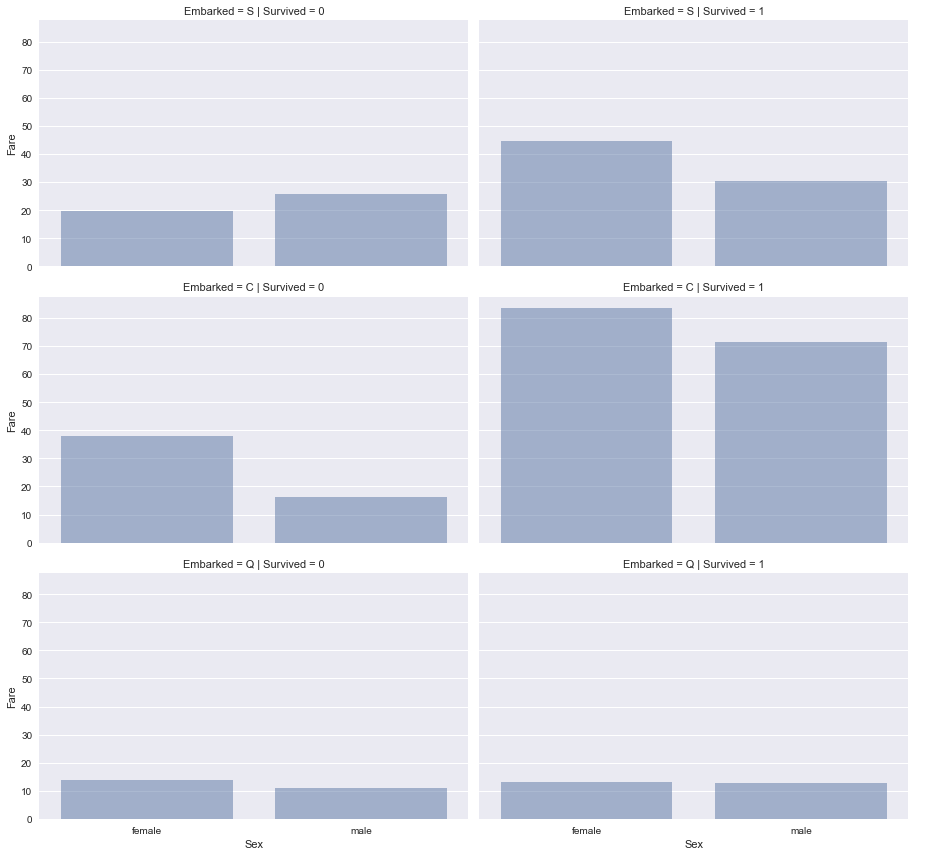

In [433]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=4, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<div class="alert alert-block alert-success">
# Cleaning / Wrangling data / Manipulating

<div class="alert alert-block alert-warning">


<seaborn.axisgrid.FacetGrid at 0x7f55029bf908>

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

  

<div class="alert alert-block alert-success">
## Look at shape of df/worksheet 

In [434]:
                                                                
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


<div class="alert alert-block alert-success">
## Remove some unwanted titles/columns

In [435]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [436]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

<div class="alert alert-block alert-info">

Before (891, 12) (418, 11) (891, 12) (418, 11)

('After', (891, 10), (418, 9), (891, 10), (418, 9))

<div class="alert alert-block alert-success">
## Creating new titles/columns, extracting from existing. 

<div class="alert alert-block alert-warning">
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Observations.

When we plot Title, Age, and Survived, we note the following observations.

    Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
    Survival among Title Age bands varies slightly.
    Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

Decision.

    We decide to retain the new Title feature for model training.

<div class="alert alert-block alert-success">
## Derive Some new columns from old columns

In [437]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

<div class="alert alert-block alert-success">
## Look at a crosstab table - Pandas - pd.crosstab


In [438]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


<div class="alert alert-block alert-info">

Sex 	female 	male
Title 		
Capt 	0 	1
Col 	0 	2
Countess 	1 	0
Don 	0 	1
Dr 	1 	6
Jonkheer 	0 	1
Lady 	1 	0
Major 	0 	2
Master 	0 	40
Miss 	182 	0
Mlle 	2 	0
Mme 	1 	0
Mr 	0 	517
Mrs 	125 	0
Ms 	1 	0
Rev 	0 	6
Sir 	0 	1

<div class="alert alert-block alert-success">
## When too many labels/columns. Merge many and label as rare

<div class="alert alert-block alert-warning">
We can replace many titles with a more common name or classify them as Rare.

In [439]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


<div class="alert alert-block alert-info">
Title 	Survived
0 	Master 	0.575000
1 	Miss 	0.702703
2 	Mr 	0.156673
3 	Mrs 	0.793651
4 	Rare 	0.347826

<div class="alert alert-block alert-success">
## Changing category labels to numbers. (Algorithms like numbers!)

We can convert the categorical titles to ordinal.

In [440]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [441]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


    train_df.head()

<div class="alert alert-block alert-info">
PassengerId 	Survived 	Pclass 	Name 	Sex 	Age 	SibSp 	Parch 	Fare 	Embarked 	Title
0 	1 	0 	3 	Braund, Mr. Owen Harris 	male 	22.0 	1 	0 	7.2500 	S 	1
1 	2 	1 	1 	Cumings, Mrs. John Bradley (Florence Briggs Th... 	female 	38.0 	1 	0 	71.2833 	C 	3
2 	3 	1 	3 	Heikkinen, Miss. Laina 	female 	26.0 	0 	0 	7.9250 	S 	2
3 	4 	1 	1 	Futrelle, Mrs. Jacques Heath (Lily May Peel) 	female 	35.0 	1 	0 	53.1000 	S 	3
4 	5 	0 	3 	Allen, Mr. William Henry 	male 	35.0 	0 	0 	8.0500 	S 	1

<div class="alert alert-block alert-success"> 
## Having derived some new columns from old. We can remove the old.

<div class="alert alert-block alert-warning">
Now we can safely drop the Name feature from training and testing 
datasets. We also do not need the PassengerId feature in the training dataset.

Note if you remove the old and 

In [442]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

<div class="alert alert-block alert-info">
((891, 9), (418, 9))

<div class="alert alert-block alert-success">

## Converting a categorical feature to a number.

<div class="alert alert-block alert-warning">
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [443]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0.0
1,1,1,1,38.0,1,0,71.2833,C,0.0
2,1,3,1,26.0,0,0,7.9250,S,0.0
3,1,1,1,35.0,1,0,53.1000,S,0.0
4,0,3,0,35.0,0,0,8.0500,S,0.0


<div class="alert alert-block alert-info">

Survived 	Pclass 	Sex 	Age 	SibSp 	Parch 	Fare 	Embarked 	Title
0 	0 	3 	0 	22.0 	1 	0 	7.2500 	S 	1
1 	1 	1 	1 	38.0 	1 	0 	71.2833 	C 	3
2 	1 	3 	1 	26.0 	0 	0 	7.9250 	S 	2
3 	1 	1 	1 	35.0 	1 	0 	53.1000 	S 	3
4 	0 	3 	0 	35.0 	0 	0 	8.0500 	S 	1

<div class="alert alert-block alert-success">
## Cleaning missing data, nulls etc. 
Completing a numerical continuous feature

<div class="alert alert-block alert-warning">

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

    A simple way is to generate random numbers between mean and standard deviation.

    More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

    Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

<div class="alert alert-block alert-success">
## Look at a histogram - FacetGrid - Sex and Pclass
grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')

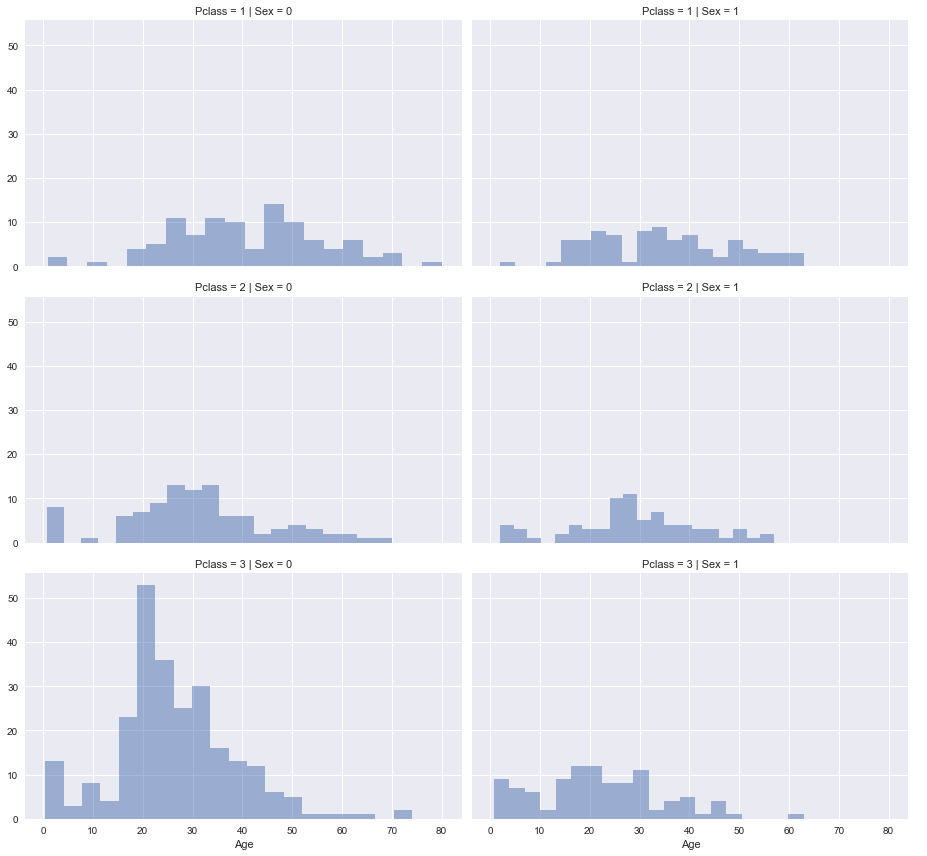

In [444]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

<div class="alert alert-block alert-success">

<seaborn.axisgrid.FacetGrid at 0x7f55026e3160>

## Guessed Age - Not sure why we are guessing age?

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [445]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

<div class="alert alert-block alert-info">

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

<div class="alert alert-block alert-success">

## Still Guessing Age Why?

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [446]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
     

       
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [447]:
age_guess

22.0

In [448]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,0.0
1,1,1,1,38,1,0,71.2833,C,0.0
2,1,3,1,26,0,0,7.9250,S,0.0
3,1,1,1,35,1,0,53.1000,S,0.0
4,0,3,0,35,0,0,8.0500,S,0.0


<div class="alert alert-block alert-info">
Survived 	Pclass 	Sex 	Age 	SibSp 	Parch 	Fare 	Embarked 	Title
0 	0 	3 	0 	22 	1 	0 	7.2500 	S 	1
1 	1 	1 	1 	38 	1 	0 	71.2833 	C 	3
2 	1 	3 	1 	26 	0 	0 	7.9250 	S 	2
3 	1 	1 	1 	35 	1 	0 	53.1000 	S 	3
4 	0 	3 	0 	35 	0 	0 	8.0500 	S 	1

<div class="alert alert-block alert-success">
## Create Age Band Column
Let us create Age bands and determine correlations with Survived.

In [449]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


<div class="alert alert-block alert-info">
AgeBand 	Survived
0 	(-0.08, 16] 	0.550000
1 	(16, 32] 	0.337374
2 	(32, 48] 	0.412037
3 	(48, 64] 	0.434783
4 	(64, 80] 	0.090909

<div class="alert alert-block alert-success">
## Remove age column and replace with new column containing numbers representing "age bands".
Let us replace Age with ordinals based on these bands.

In [450]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,0.0,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,0.0,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,0.0,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,0.0,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,0.0,"(32, 48]"


<div class="alert alert-block alert-info">

Survived 	Pclass 	Sex 	Age 	SibSp 	Parch 	Fare 	Embarked 	Title 	AgeBand
0 	0 	3 	0 	1 	1 	0 	7.2500 	S 	1 	(16, 32]
1 	1 	1 	1 	2 	1 	0 	71.2833 	C 	3 	(32, 48]
2 	1 	3 	1 	1 	0 	0 	7.9250 	S 	2 	(16, 32]
3 	1 	1 	1 	2 	1 	0 	53.1000 	S 	3 	(32, 48]
4 	0 	3 	0 	2 	0 	0 	8.0500 	S 	1 	(32, 48]

<div class="alert alert-block alert-success">
## Remove the column 'Age Bands' as we swapped it for a number'
We can not remove the AgeBand feature.

In [451]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

In [452]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,0.0
1,1,1,1,2,1,0,71.2833,C,0.0
2,1,3,1,1,0,0,7.9250,S,0.0
3,1,1,1,2,1,0,53.1000,S,0.0
4,0,3,0,2,0,0,8.0500,S,0.0


<div class="alert alert-block alert-info">
Survived 	Pclass 	Sex 	Age 	SibSp 	Parch 	Fare 	Embarked 	Title
0 	0 	3 	0 	1 	1 	0 	7.2500 	S 	1
1 	1 	1 	1 	2 	1 	0 	71.2833 	C 	3
2 	1 	3 	1 	1 	0 	0 	7.9250 	S 	2
3 	1 	1 	1 	2 	1 	0 	53.1000 	S 	3
4 	0 	3 	0 	2 	0 	0 	8.0500 	S 	1
Create new feature combining existing features

<div class="alert alert-block alert-success">
## New column that estimates Family Size.
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [453]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [454]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


<div class="alert alert-block alert-info">
FamilySize 	Survived
3 	4 	0.724138
2 	3 	0.578431
1 	2 	0.552795
6 	7 	0.333333
0 	1 	0.303538
4 	5 	0.200000
5 	6 	0.136364
7 	8 	0.000000
8 	11 	0.000000

<div class="alert alert-block alert-success">
## New column that that identifies if somesomeone travelled alone
We can create another feature called IsAlone.

In [455]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [456]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


<div class="alert alert-block alert-info">
IsAlone 	Survived
0 	0 	0.505650
1 	1 	0.303538

<div class="alert alert-block alert-success">
## Remove unwanted columns in favour of IsAlong
Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [457]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,0.0,2,0
1,1,1,1,2,1,0,71.2833,C,0.0,2,0
2,1,3,1,1,0,0,7.9250,S,0.0,1,1
3,1,1,1,2,1,0,53.1000,S,0.0,2,0
4,0,3,0,2,0,0,8.0500,S,0.0,1,1
5,0,3,0,1,0,0,8.4583,Q,0.0,1,1
6,0,1,0,3,0,0,51.8625,S,0.0,1,1
7,0,3,0,0,3,1,21.0750,S,0.0,5,0
8,1,3,1,1,0,2,11.1333,S,0.0,3,0
9,1,2,1,0,1,0,30.0708,C,0.0,2,0


In [458]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [459]:
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)


In [460]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,0.0,1
1,893,3,1,2,7.0000,S,0.0,0
2,894,2,0,3,9.6875,Q,0.0,1
3,895,3,0,1,8.6625,S,0.0,1
4,896,3,1,1,12.2875,S,0.0,0
5,897,3,0,0,9.2250,S,0.0,1
6,898,3,1,1,7.6292,Q,0.0,1
7,899,2,0,1,29.0000,S,0.0,0
8,900,3,1,1,7.2292,C,0.0,1
9,901,3,0,1,24.1500,S,0.0,0


In [461]:
combine = [train_df, test_df]

In [534]:
combine


[     Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
 0           0       3    0    1     0         0    0.0        0          3
 1           1       1    1    2     3         1    0.0        0          2
 2           1       3    1    1     1         0    0.0        1          3
 3           1       1    1    2     3         0    0.0        0          2
 4           0       3    0    2     1         0    0.0        1          6
 5           0       3    0    1     1         2    0.0        1          3
 6           0       1    0    3     3         0    0.0        1          3
 7           0       3    0    0     2         0    0.0        0          0
 8           1       3    1    1     1         0    0.0        0          3
 9           1       2    1    0     2         1    0.0        0          0
 10          1       3    1    0     2         0    0.0        0          0
 11          1       1    1    3     2         0    0.0        1          3
 12         

In [463]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,0.0,0
1,1,1,1,2,71.2833,C,0.0,0
2,1,3,1,1,7.9250,S,0.0,1
3,1,1,1,2,53.1000,S,0.0,0
4,0,3,0,2,8.0500,S,0.0,1


<div class="alert alert-block alert-info">
Survived 	Pclass 	Sex 	Age 	Fare 	Embarked 	Title 	IsAlone
0 	0 	3 	0 	1 	7.2500 	S 	1 	0
1 	1 	1 	1 	2 	71.2833 	C 	3 	0
2 	1 	3 	1 	1 	7.9250 	S 	2 	1
3 	1 	1 	1 	2 	53.1000 	S 	3 	0
4 	0 	3 	0 	2 	8.0500 	S 	1 	1

<div class="alert alert-block alert-success">
## Getting creative with adding Columns. Mash togeather Travel Class and Age

We can also create an artificial feature combining Pclass and Age.

In [464]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


<div class="alert alert-block alert-info">
Age*Class 	Age 	Pclass
0 	3 	1 	3
1 	2 	2 	1
2 	3 	1 	3
3 	2 	2 	1
4 	6 	2 	3
5 	3 	1 	3
6 	3 	3 	1
7 	0 	0 	3
8 	3 	1 	3
9 	0 	0 	2

<div class="alert alert-block alert-success">

## Removing Blanks with most common occurence from a column

### Completing a categorical feature

<div class="alert alert-block alert-warning">
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [465]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

'S'

In [466]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    

In [467]:

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<div class="alert alert-block alert-info">
Embarked 	Survived
0 	C 	0.553571
1 	Q 	0.389610
2 	S 	0.339009

<div class="alert alert-block alert-success">
## Converting categorical column to numeric

#### We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [468]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [469]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0.0,0,3
1,1,1,1,2,71.2833,1,0.0,0,2
2,1,3,1,1,7.9250,0,0.0,1,3
3,1,1,1,2,53.1000,0,0.0,0,2
4,0,3,0,2,8.0500,0,0.0,1,6


<div class="alert alert-block alert-info">
Survived 	Pclass 	Sex 	Age 	Fare 	Embarked 	Title 	IsAlone 	Age*Class
0 	0 	3 	0 	1 	7.2500 	0 	1 	0 	3
1 	1 	1 	1 	2 	71.2833 	1 	3 	0 	2
2 	1 	3 	1 	1 	7.9250 	0 	2 	1 	3
3 	1 	1 	1 	2 	53.1000 	0 	3 	0 	2
4 	0 	3 	0 	2 	8.0500 	0 	1 	1 	6

<div class="alert alert-block alert-success">

## Cleaning and Prepping Hack

Quick completing and converting a numeric feature

<div class="alert alert-block alert-warning">

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [470]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [471]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,0.0,1,6
1,893,3,1,2,7.0000,0,0.0,0,6
2,894,2,0,3,9.6875,2,0.0,1,6
3,895,3,0,1,8.6625,0,0.0,1,3
4,896,3,1,1,12.2875,0,0.0,0,3


<div class="alert alert-block alert-info">
PassengerId 	Pclass 	Sex 	Age 	Fare 	Embarked 	Title 	IsAlone 	Age*Class
0 	892 	3 	0 	2 	7.8292 	2 	1 	1 	6
1 	893 	3 	1 	2 	7.0000 	0 	3 	0 	6
2 	894 	2 	0 	3 	9.6875 	2 	1 	1 	6
3 	895 	3 	0 	1 	8.6625 	0 	1 	1 	3
4 	896 	3 	1 	1 	12.2875 	0 	3 	0 	3

We can not create FareBand.

<div class="alert alert-block alert-success">
## Convert Numeric column into 4 Binned Groups


In [472]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


<div class="alert alert-block alert-info">
FareBand 	Survived
0 	[0, 7.91] 	0.197309m
1 	(7.91, 14.454] 	0.303571
2 	(14.454, 31] 	0.454955

3 	(31, 512.329] 	0.581081

<div class="alert alert-block alert-success">
## Convert the Fare feature to ordinal values based on the FareBand.

In [473]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0.0,0,3
1,1,1,1,2,3,1,0.0,0,2
2,1,3,1,1,1,0,0.0,1,3
3,1,1,1,2,3,0,0.0,0,2
4,0,3,0,2,1,0,0.0,1,6
5,0,3,0,1,1,2,0.0,1,3
6,0,1,0,3,3,0,0.0,1,3
7,0,3,0,0,2,0,0.0,0,0
8,1,3,1,1,1,0,0.0,0,3
9,1,2,1,0,2,1,0.0,0,0


<div class="alert alert-block alert-info">
Survived 	Pclass 	Sex 	Age 	Fare 	Embarked 	Title 	IsAlone 	Age*Class
0 	0 	3 	0 	1 	0 	0 	1 	0 	3
1 	1 	1 	1 	2 	3 	1 	3 	0 	2
2 	1 	3 	1 	1 	1 	0 	2 	1 	3
3 	1 	1 	1 	2 	3 	0 	3 	0 	2
4 	0 	3 	0 	2 	1 	0 	1 	1 	6
5 	0 	3 	0 	1 	1 	2 	1 	1 	3
6 	0 	1 	0 	3 	3 	0 	1 	1 	3
7 	0 	3 	0 	0 	2 	0 	4 	0 	0
8 	1 	3 	1 	1 	1 	0 	3 	0 	3
9 	1 	2 	1 	0 	2 	1 	3 	0 	0

And the test dataset.

In [474]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,0.0,1,6
1,893,3,1,2,0,0,0.0,0,6
2,894,2,0,3,1,2,0.0,1,6
3,895,3,0,1,1,0,0.0,1,3
4,896,3,1,1,1,0,0.0,0,3
5,897,3,0,0,1,0,0.0,1,0
6,898,3,1,1,0,2,0.0,1,3
7,899,2,0,1,2,0,0.0,0,2
8,900,3,1,1,0,1,0.0,1,3
9,901,3,0,1,2,0,0.0,0,3


<div class="alert alert-block alert-info">
PassengerId 	Pclass 	Sex 	Age 	Fare 	Embarked 	Title 	IsAlone 	Age*Class
0 	892 	3 	0 	2 	0 	2 	1 	1 	6
1 	893 	3 	1 	2 	0 	0 	3 	0 	6
2 	894 	2 	0 	3 	1 	2 	1 	1 	6
3 	895 	3 	0 	1 	1 	0 	1 	1 	3
4 	896 	3 	1 	1 	1 	0 	3 	0 	3
5 	897 	3 	0 	0 	1 	0 	1 	1 	0
6 	898 	3 	1 	1 	0 	2 	2 	1 	3
7 	899 	2 	0 	1 	2 	0 	1 	0 	2
8 	900 	3 	1 	1 	0 	1 	3 	1 	3
9 	901 	3 	0 	1 	2 	0 	1 	0 	3

<div class="alert alert-block alert-success">
# It's Game Time!!! => we are finally running algorithms

<div class="alert alert-block alert-success">
# Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

1. **Logistic Regression**
2. **KNN or k-Nearest Neighbors**
3. **Support Vector Machines**
4. **Naive Bayes classifier**
5. **Decision Tree**
6. **Random Forrest**
7. **Perceptron**
8. **Artificial neural network**
9. **RVM or Relevance Vector Machine**

In [475]:

X_train = train_df.drop("Survived", axis=1)

Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891L,), (418, 8))

<div class="alert alert-block alert-info">
((891, 8), (891,), (418, 8))

In [535]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,0.0,0,3
1,1,1,2,3,1,0.0,0,2
2,3,1,1,1,0,0.0,1,3
3,1,1,2,3,0,0.0,0,2
4,3,0,2,1,0,0.0,1,6
5,3,0,1,1,2,0.0,1,3
6,1,0,3,3,0,0.0,1,3
7,3,0,0,2,0,0.0,0,0
8,3,1,1,1,0,0.0,0,3
9,2,1,0,2,1,0.0,0,0


In [540]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,0.0,1,6
1,3,1,2,0,0,0.0,0,6
2,2,0,3,1,2,0.0,1,6
3,3,0,1,1,0,0.0,1,3
4,3,1,1,1,0,0.0,0,3
5,3,0,0,1,0,0.0,1,0
6,3,1,1,0,2,0.0,1,3
7,2,0,1,2,0,0.0,0,2
8,3,1,1,0,1,0.0,1,3
9,3,0,1,2,0,0.0,0,3


In [542]:
Y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

<div class="alert alert-block alert-success">
# Logistic Regression

![Image of Yaktocat](http://2.bp.blogspot.com/-1Sp4yAeYZA4/UeQ0rn-nZNI/AAAAAAAAAQI/IllWcCVa8jE/s1600/Screen+Shot+2013-07-15+at+6.42.30+PM.png)

![Image of Yaktocat](http://gerardnico.com/wiki/_media/data_mining/logistic_regression_vs_linear.jpg)

![Image of Yaktocat](http://www.math.yorku.ca/SCS/spida/lm/mreganim1.gif)

In [476]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

<div class="alert alert-block alert-info">
80.359999999999999

<div class="alert alert-block alert-warning">

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

    Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
    Inversely as Pclass increases, probability of Survived=1 decreases the most.
    This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
    So is Title as second highest positive correlation.

In [477]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

In [478]:
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.484782
2,Age,0.313065
4,Embarked,0.263729
5,Title,0.000000
3,Fare,-0.022134
6,IsAlone,-0.026452
7,Age*Class,-0.334738
0,Pclass,-0.672669


<div class="alert alert-block alert-info">
Feature 	Correlation
1 	Sex 	2.201527
5 	Title 	0.3982m34
2 	Age 	0.287163
4 	Embarked 	0.261762
6 	IsAlone 	0.129140
3 	Fare 	-0.085150
7 	Age*Class 	-0.311200
0 	Pclass 	-0.749007

<div class="alert alert-block alert-warning">

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

Note that the model generates a confidence score which is higher than Logistics Regression model.

<div class="alert alert-block alert-success">
# Support Vector Machines

<div class="alert alert-block alert-success">
# Support Vector Machines


![Image of Yaktocat](https://image.slidesharecdn.com/svm-140807035301-phpapp01/95/support-vector-machine-without-tears-5-638.jpg?cb=1407384107)

![Image of Yaktocat](https://i.stack.imgur.com/1gvce.png)

In [479]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.6

<div class="alert alert-block alert-info">
83.840000000000003

<div class="alert alert-block alert-warning">

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

<div class="alert alert-block alert-success">

# KNN (k-nearest neighbors)

knn confidence score is better than Logistics Regression but worse than SVM.

![Image of Yaktocat](https://static1.squarespace.com/static/55ff6aece4b0ad2d251b3fee/t/5752540b8a65e246000a2cf9/1465017829684/)

![Image of Yaktocat](http://www.robotshop.com/letsmakerobots/files/userpics/u11554/kNN_machine_learning.jpg)

In [488]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.73

<div class="alert alert-block alert-info">
84.739999999999995

<div class="alert alert-block alert-warning">
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

The model generated confidence score is the lowest among the models evaluated so far.

<div class="alert alert-block alert-success">
# Gaussian Naive Bayes

![Image of Yaktocat](http://www.saedsayad.com/images/Bayes_rule.png)

![Image of Yaktocat](https://image.slidesharecdn.com/ecsqaru05-con-ugr-151124191844-lva1-app6891/95/selective-gaussian-nave-bayes-model-for-diffuse-largebcell-lymphoma-classification-some-improvements-in-preprocessing-and-variable-elimination-7-638.jpg?cb=1448392774)

![Image of Yaktocat](https://www.researchgate.net/profile/Yune_Lee/publication/255695722/figure/fig1/AS:297967207632900@1448052327024/Figure-1-Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each.png)

![Image of Yaktocat](https://alliance.seas.upenn.edu/~cis520/dynamic/2016/wiki/uploads/Lectures/2class_gauss_NB_small.jpg)

![Image of Yaktocat](https://cdn-images-1.medium.com/max/800/1*nIZJVjt1tRLwYpnWX5W39w.png)

In [481]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

68.01

<div class="alert alert-block alert-info">
72.280000000000001

<div class="alert alert-block alert-warning">
The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference Wikipedia.

<div class="alert alert-block alert-success">
# Perceptron

![Image of Yaktocat](http://www.saedsayad.com/images/Perceptron_1.png)

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/500px-Perceptron_example.svg.png)

In [482]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.45

<div class="alert alert-block alert-success">
# Linear Support Vector Classification

In [483]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.24

<div class="alert alert-block alert-warning">
79.010000000000005

<div class="alert alert-block alert-success">
# Stochastic Gradient Descent

![Image of Yaktocat](https://deeplearning4j.org/img/updater_1.png)

![Image of Yaktocat](http://www.bogotobogo.com/python/scikit-learn/images/Batch-vs-Stochastic-Gradient-Descent/stochastic-vs-batch-gradient-descent.png)

In [484]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.33

<div class="alert alert-block alert-info">
77.890000000000001

<div class="alert alert-block alert-warning">

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

<div class="alert alert-block alert-success">
# Decision Tree

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

![Image of Yaktocat](http://christianherta.de/lehre/dataScience/machineLearning/data/titanic.png)

In [556]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

<div class="alert alert-block alert-info">
86.760000000000005

In [563]:
ASD = decision_tree.score(X_train, Y_train)

In [566]:
ASD * 100, 2

(85.746352413019082, 2)

<div class="alert alert-block alert-warning">
The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

<div class="alert alert-block alert-success">
# Random Forest

![Image of Yaktocat](https://image.slidesharecdn.com/lnt-140707110101-phpapp01/95/decision-forests-and-discriminant-analysis-77-638.jpg?cb=1405575503)

![Image of Yaktocat](https://www.researchgate.net/profile/Erika_Amstalden_van_Hove/publication/228540194/figure/fig1/AS:301839783350274@1448975620988/Figure-1-The-Random-Forest-classifier-is-an-ensemble-of-decision-trees-where-the-single.png)

![Image of Yaktocat](https://martin-thoma.com/images/2016/01/ml-classifiers-2.png)

In [529]:
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

<div class="alert alert-block alert-info">
86.760000000000005

In [487]:
Ada_Boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

NameError: name 'bdt' is not defined

<div class="alert alert-block alert-success">
# Ada Boost

In [491]:
Ada_Boost =  AdaBoostClassifier(n_estimators=100)
Ada_Boost.fit(X_train, Y_train)
Y_pred = Ada_Boost.predict(X_test)
Ada_Boost.score(X_train, Y_train)
acc_Ada_Boost = round(Ada_Boost.score(X_train, Y_train) * 100, 2)
acc_Ada_Boost

80.02

<div class="alert alert-block alert-success">
# Picking a Model. 
(Evaluation &  Ensembling)

<div class="alert alert-block alert-warning">We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [515]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Ada Boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_Ada_Boost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
8,Decision Tree,85.75
1,KNN,83.73
0,Support Vector Machines,82.60
9,Ada Boost,80.02
2,Logistic Regression,79.24
7,Linear SVC,79.24
5,Perceptron,78.45
6,Stochastic Gradient Decent,77.33
4,Naive Bayes,68.01


<div class="alert alert-block alert-info">
Model 	Score
3 	Random Forest 	86.76
8 	Decision Tree 	86.76
1 	KNN 	84.74
0 	Support Vector Machines 	83.84
2 	Logistic Regression 	80.36
7 	Linear SVC 	79.01
5 	Perceptron 	78.00
6 	Stochastic Gradient Decent 	77.89
4 	Naive Bayes 	72.28

In [511]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,0.0,1,6
1,893,3,1,2,0,0,0.0,0,6
2,894,2,0,3,1,2,0.0,1,6
3,895,3,0,1,1,0,0.0,1,3
4,896,3,1,1,1,0,0.0,0,3
5,897,3,0,0,1,0,0.0,1,0
6,898,3,1,1,0,2,0.0,1,3
7,899,2,0,1,2,0,0.0,0,2
8,900,3,1,1,0,1,0.0,1,3
9,901,3,0,1,2,0,0.0,0,3


In [517]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0.0,0,3
1,1,1,1,2,3,1,0.0,0,2
2,1,3,1,1,1,0,0.0,1,3
3,1,1,1,2,3,0,0.0,0,2
4,0,3,0,2,1,0,0.0,1,6
5,0,3,0,1,1,2,0.0,1,3
6,0,1,0,3,3,0,0.0,1,3
7,0,3,0,0,2,0,0.0,0,0
8,1,3,1,1,1,0,0.0,0,3
9,1,2,1,0,2,1,0.0,0,0


In [505]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [506]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


<div class="alert alert-block alert-success">
# Kaggle Submission
### submission.to_csv('../output/submission.csv', index=False)# 

<div class="alert alert-block alert-warning">
Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.
References

This notebook has been created based on great work done solving the Titanic competition and other sources.

    A journey through Titanic
    Getting Started with Pandas: Kaggle's Titanic Competition
    Titanic Best Working Classifier

In [507]:
submission.to_csv('C:/Users/Toshiba/Documents/submission.csv', index=False)

<div class="alert alert-block alert-danger">

# Playing Around

<div class="alert alert-block alert-success">
# Correlation with MatPlot


In [ ]:
plt.matshow(train_df.corr())

<div class="alert alert-block alert-success">
# Correlation with Seaborn


In [ ]:
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmin=corr.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":16})

<div class="alert alert-block alert-success">
# Correlation with Corrplot


In [ ]:
plt.figure(figsize=(15, 15))
d = corrplot.Corrplot(train_df)
d.plot()

In [ ]:
sns.corrplot(d)

In [ ]:
sns.heatmap(train_df, vmin=train_df.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})

In [ ]:
sns.clustermap(train_df)

In [ ]:
<img src=http://www.math.yorku.ca/SCS/spida/lm/mreganim1.gif title="Title text" />

__[Link To A Image](http://gerardnico.com/wiki/_media/data_mining/logistic_regression_vs_linear.jpg)__

In [ ]:
<img src="url.gif" alt="Alt text that describes the graphic" title="Title text" />

In [ ]:
from IPython.display import Image
Image("C:/Users/Toshiba/Downloadsm/reganim1.gif")

In [ ]:
image

In [ ]:
![Image of Yaktocat](http://2.bp.blogspot.com/-1Sp4yAeYZA4/UeQ0rn-nZNI/AAAAAAAAAQI/IllWcCVa8jE/s1600/Screen+Shot+2013-07-15+at+6.42.30+PM.png)

In [504]:
models1 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 
              'Decision Tree', 'Ada Boost'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_decision_tree, acc_Ada_Boost]})
models1.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,85.75
3,Decision Tree,85.75
1,KNN,83.73
0,Support Vector Machines,82.60
4,Ada Boost,80.02
